# ML Based Energy Consumption Prediction

In [4]:
import pandas as pd

In [6]:
# Load the CSV files
df_2018 = pd.read_csv('C:/Users/anzel/Desktop/Final/Datasets/boulder 2018.csv')
df_2019 = pd.read_csv('C:/Users/anzel/Desktop/Final/Datasets/boulder 2019.csv')
df_2020 = pd.read_csv('C:/Users/anzel/Desktop/Final/Datasets/boulder 2020.csv')
df_2021 = pd.read_csv('C:/Users/anzel/Desktop/Final/Datasets/boulder 2021.csv')
df_2022 = pd.read_csv('C:/Users/anzel/Desktop/Final/Datasets/boulder 2022.csv')
df_2023 = pd.read_csv('C:/Users/anzel/Desktop/Final/Datasets/boulder 2023.csv')

In [8]:
# Check for the 'datetime' column in both DataFrames
if 'datetime' in df_2018.columns and 'datetime' in df_2019.columns and 'datetime' in df_2020.columns and 'datetime' in df_2021.columns and 'datetime' in df_2022.columns and 'datetime' in df_2023.columns:
    # Concatenate the DataFrames
    combined_df = pd.concat([df_2018, df_2019, df_2020, df_2021, df_2022, df_2023], ignore_index=True)
    
    # Convert 'datetime' to a datetime object for sorting
    combined_df['datetime'] = pd.to_datetime(combined_df['datetime'], errors='coerce')
    
    # Sort by 'datetime' in ascending order
    combined_df = combined_df.sort_values(by='datetime', ascending=True).reset_index(drop=True)
    
    # Save the merged and sorted DataFrame
    output_path = 'C:/Users/anzel/Desktop/Final/weather.csv'
    combined_df.to_csv(output_path, index=False)

In [10]:
# Load the CSV files
df_boulder = pd.read_csv("C:/Users/anzel/Desktop/Final/weather.csv")
df_ev_charging = pd.read_csv("C:/Users/anzel/Desktop/Final/Datasets/Electric_Vehicle_Charging_Station_Data_-7419010956190451245.csv")

In [12]:
# Check if the required columns exist in each dataframe
if 'datetime' not in df_boulder.columns:
    print("Column 'datetime' does not exist in boulder 2018.csv")
elif 'Start_Date___Time' not in df_ev_charging.columns:
    print("Column 'Start_Date___Time' does not exist in Electric_Vehicle_Charging_Station_Data_-7419010956190451245.csv")
else:
    # If columns exist, proceed with selecting columns and merging

    # Create a new 'Date' column in each DataFrame for merging
    df_boulder['Date'] = pd.to_datetime(df_boulder['datetime'], errors='coerce').dt.date
    df_ev_charging['Date'] = pd.to_datetime(df_ev_charging['Start_Date___Time'], errors='coerce').dt.date


In [14]:
# Select only the required columns from df_boulder
df_boulder_selected = df_boulder[['Date', 'tempmax', 'tempmin', 'precip', 'snow']]

In [16]:
# Perform the merge using the 'Date' column without altering 'Start_Date___Time'
merged_df = pd.merge(df_ev_charging, df_boulder_selected, on='Date', how='inner')

In [18]:
# Define the output path and save the merged data
output_path = 'C:/Users/anzel/Desktop/Final/merged_data.csv'
merged_df.to_csv(output_path, index=False)

In [20]:
# Print confirmation of the save location
print(f"Merged data saved to {output_path}")

Merged data saved to C:/Users/anzel/Desktop/Final/merged_data.csv


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
merged_df = pd.read_csv('C:/Users/anzel/Desktop/Final/merged_data.csv')

In [26]:
merged_df.head(7)

Station_Name           Address     City State_Province  \
0  BOULDER / JUNCTION ST1  2280 Junction Pl  Boulder       Colorado   
1  BOULDER / JUNCTION ST1  2280 Junction Pl  Boulder       Colorado   
2  BOULDER / JUNCTION ST1  2280 Junction Pl  Boulder       Colorado   
3  BOULDER / JUNCTION ST1  2280 Junction Pl  Boulder       Colorado   
4  BOULDER / JUNCTION ST1  2280 Junction Pl  Boulder       Colorado   
5  BOULDER / JUNCTION ST1  2280 Junction Pl  Boulder       Colorado   
6    BOULDER / ALPINE ST1   1275 Alpine Ave  Boulder       Colorado   

   Zip_Postal_Code Start_Date___Time Start_Time_Zone   End_Date___Time  \
0            80301  01/01/2018 17:49             MDT  01/01/2018 19:52   
1            80301  01/01/2018 17:49             MDT  01/01/2018 19:52   
2            80301  01/02/2018 08:52             MDT  01/02/2018 09:16   
3            80301  01/02/2018 21:11             MDT  01/03/2018 06:23   
4            80301  01/02/2018 08:52             MDT  01/02/2018 09:16   
5            80301  01/02/2018 21:11             MDT  01/03/2018 06:23   
6            80304  01/03/2018 09:19             MDT  01/03/2018 11:14   

  End_Time_Zone Total_Duration__hh_mm_ss_  ... GHG_Savings__kg_  \
0           MDT                   2:03:02  ...            2.732   
1           MDT                   2:03:02  ...            2.732   
2           MDT                   0:24:34  ...            1.042   
3           MDT                   9:12:21  ...            6.319   
4           MDT                   0:24:34  ...            1.042   
5           MDT                   9:12:21  ...            6.319   
6           MDT                   1:54:51  ...            2.918   

   Gasoline_Savings__gallons_  Port_Type  ObjectID ObjectId2        Date  \
0                       0.816    Level 2         0         1  2018-01-01   
1                       0.816    Level 2         0     70195  2018-01-01   
2                       0.311    Level 2         1         2  2018-01-02   
3                       1.888    Level 2         2         3  2018-01-02   
4                       0.311    Level 2         1     70196  2018-01-02   
5                       1.888    Level 2         2     70197  2018-01-02   
6                       0.872    Level 2         3         4  2018-01-03   

   tempmax tempmin  precip  snow  
0     -1.1   -10.0     0.0   0.0  
1     -1.1   -10.0     0.0   0.0  
2      6.0    -8.8     0.0   0.0  
3      6.0    -8.8     0.0   0.0  
4      6.0    -8.8     0.0   0.0  
5      6.0    -8.8     0.0   0.0  
6      7.3    -5.2     0.0   0.0  

[7 rows x 22 columns]

## Data Preprocessing

In [29]:
merged_df.drop(columns=['End_Date___Time'], inplace=True)

In [31]:
# Convert non-numeric columns to numeric or handle them appropriately
merged_df['tempmin'] = pd.to_numeric(merged_df['tempmin'], errors='coerce')
merged_df['precip'] = pd.to_numeric(merged_df['precip'], errors='coerce')
merged_df['snow'] = pd.to_numeric(merged_df['snow'], errors='coerce')
merged_df['Total_Duration__hh_mm_ss_'] = pd.to_numeric(merged_df['Total_Duration__hh_mm_ss_'], errors='coerce')
merged_df['Charging_Time__hh_mm_ss_'] = pd.to_numeric(merged_df['Charging_Time__hh_mm_ss_'], errors='coerce')

In [33]:
from sklearn.impute import SimpleImputer

# Select features and target
X = merged_df[['tempmax', 'tempmin', 'precip', 'snow']]
y = merged_df['Energy__kWh_']

# Impute missing values for numeric columns
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [35]:
# Check for null values
null_values = merged_df.isnull().sum()

# Display columns with null values
print("Columns with null values:")
print(null_values[null_values > 0])

Columns with null values:
Total_Duration__hh_mm_ss_    143079
Charging_Time__hh_mm_ss_     143079
dtype: int64


In [37]:
# Handling missing values in numeric columns
numeric_cols = ['tempmin', 'precip', 'snow', 'Total_Duration__hh_mm_ss_', 'Charging_Time__hh_mm_ss_']
imputer = SimpleImputer(strategy='mean')
imputed_values = imputer.fit_transform(merged_df[numeric_cols])

# Print the imputed values
print("Imputed values:")
print(imputed_values)

Imputed values:
[[-10.    0.    0. ]
 [-10.    0.    0. ]
 [ -8.8   0.    0. ]
 ...
 [ -3.1   0.    0. ]
 [ -3.1   0.    0. ]
 [ -3.1   0.    0. ]]


In [39]:
# Handling missing values in numeric columns
numeric_cols = ['tempmin', 'precip', 'snow']
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
merged_df[numeric_cols] = imputer.fit_transform(merged_df[numeric_cols])

In [41]:
# Check for missing values in the specified numeric columns
missing_values = merged_df[numeric_cols].isnull().sum()
print("Missing values in specified numeric columns:")
print(missing_values)

Missing values in specified numeric columns:
tempmin    0
precip     0
snow       0
dtype: int64


In [43]:
# Handling missing values in duration columns
duration_cols = ['Total_Duration__hh_mm_ss_', 'Charging_Time__hh_mm_ss_']
for col in duration_cols:
    merged_df[col] = pd.to_timedelta(merged_df[col], errors='coerce')

In [45]:
# Check for missing values in the DataFrame
missing_values_after_imputation = merged_df.isnull().sum()
print("Missing values after imputation:")
print(missing_values_after_imputation)

Missing values after imputation:
Station_Name                       0
Address                            0
City                               0
State_Province                     0
Zip_Postal_Code                    0
Start_Date___Time                  0
Start_Time_Zone                    0
End_Time_Zone                      0
Total_Duration__hh_mm_ss_     143079
Charging_Time__hh_mm_ss_      143079
Energy__kWh_                       0
GHG_Savings__kg_                   0
Gasoline_Savings__gallons_         0
Port_Type                          0
ObjectID                           0
ObjectId2                          0
Date                               0
tempmax                            0
tempmin                            0
precip                             0
snow                               0
dtype: int64


In [47]:
# Fill missing values in 'Total_Duration_hh_mm_ss' and 'Charging_Time_hh_mm_ss' columns with zeros
merged_df['Total_Duration__hh_mm_ss_'].fillna(pd.Timedelta(seconds=0), inplace=True)
merged_df['Charging_Time__hh_mm_ss_'].fillna(pd.Timedelta(seconds=0), inplace=True)

# Check for missing values after filling with zeros
missing_values_after_fill = merged_df.isnull().sum()
print("Missing values after filling with zeros:")
print(missing_values_after_fill)

Missing values after filling with zeros:
Station_Name                  0
Address                       0
City                          0
State_Province                0
Zip_Postal_Code               0
Start_Date___Time             0
Start_Time_Zone               0
End_Time_Zone                 0
Total_Duration__hh_mm_ss_     0
Charging_Time__hh_mm_ss_      0
Energy__kWh_                  0
GHG_Savings__kg_              0
Gasoline_Savings__gallons_    0
Port_Type                     0
ObjectID                      0
ObjectId2                     0
Date                          0
tempmax                       0
tempmin                       0
precip                        0
snow                          0
dtype: int64


## Exploratory Data Analysis (EDA)

In [50]:
print("\nSummary statistics:")
print(merged_df.describe())


Summary statistics:
       Zip_Postal_Code Total_Duration__hh_mm_ss_ Charging_Time__hh_mm_ss_  \
count    143079.000000                    143079                   143079   
mean      80302.579834           0 days 00:00:00          0 days 00:00:00   
std           1.116978           0 days 00:00:00          0 days 00:00:00   
min       80301.000000           0 days 00:00:00          0 days 00:00:00   
25%       80302.000000           0 days 00:00:00          0 days 00:00:00   
50%       80302.000000           0 days 00:00:00          0 days 00:00:00   
75%       80303.000000           0 days 00:00:00          0 days 00:00:00   
max       80305.000000           0 days 00:00:00          0 days 00:00:00   

        Energy__kWh_  GHG_Savings__kg_  Gasoline_Savings__gallons_  \
count  143079.000000     143079.000000               143079.000000   
mean        8.456599          5.276129                    1.061304   
std         8.848392          5.957447                    1.110473   
min  

In [52]:
# Select only numeric columns
numeric_df = merged_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
print("\nCorrelation matrix:")
corr_matrix = numeric_df.corr()
print(corr_matrix)


Correlation matrix:
                            Zip_Postal_Code  Energy__kWh_  GHG_Savings__kg_  \
Zip_Postal_Code                    1.000000     -0.005109         -0.000815   
Energy__kWh_                      -0.005109      1.000000          0.966699   
GHG_Savings__kg_                  -0.000815      0.966699          1.000000   
Gasoline_Savings__gallons_        -0.005109      1.000000          0.966699   
ObjectID                           0.044135      0.056525          0.199007   
ObjectId2                          0.030565      0.028053          0.106284   
tempmax                           -0.016319     -0.038927         -0.021255   
tempmin                           -0.012487     -0.032288         -0.012953   
precip                            -0.002877      0.001715          0.009752   
snow                               0.016316      0.015097          0.020222   

                            Gasoline_Savings__gallons_  ObjectID  ObjectId2  \
Zip_Postal_Code               

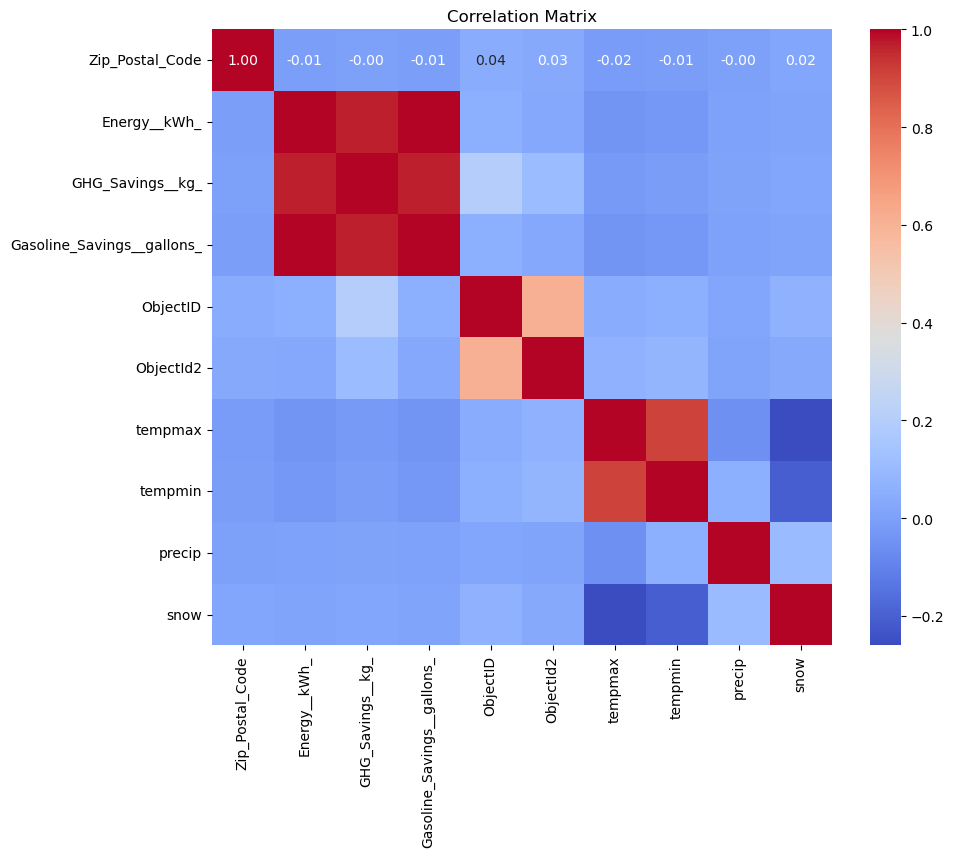

In [54]:
# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [56]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

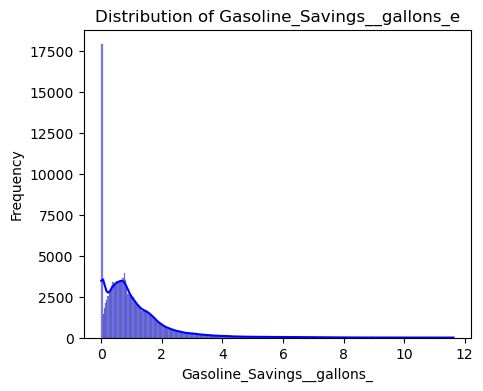

In [58]:
# Distribution of the target variable
plt.figure(figsize=(5, 4))
sns.histplot(merged_df['Gasoline_Savings__gallons_'], kde=True, color='blue')
plt.title('Distribution of Gasoline_Savings__gallons_e')
plt.xlabel('Gasoline_Savings__gallons_')
plt.ylabel('Frequency')
plt.show()

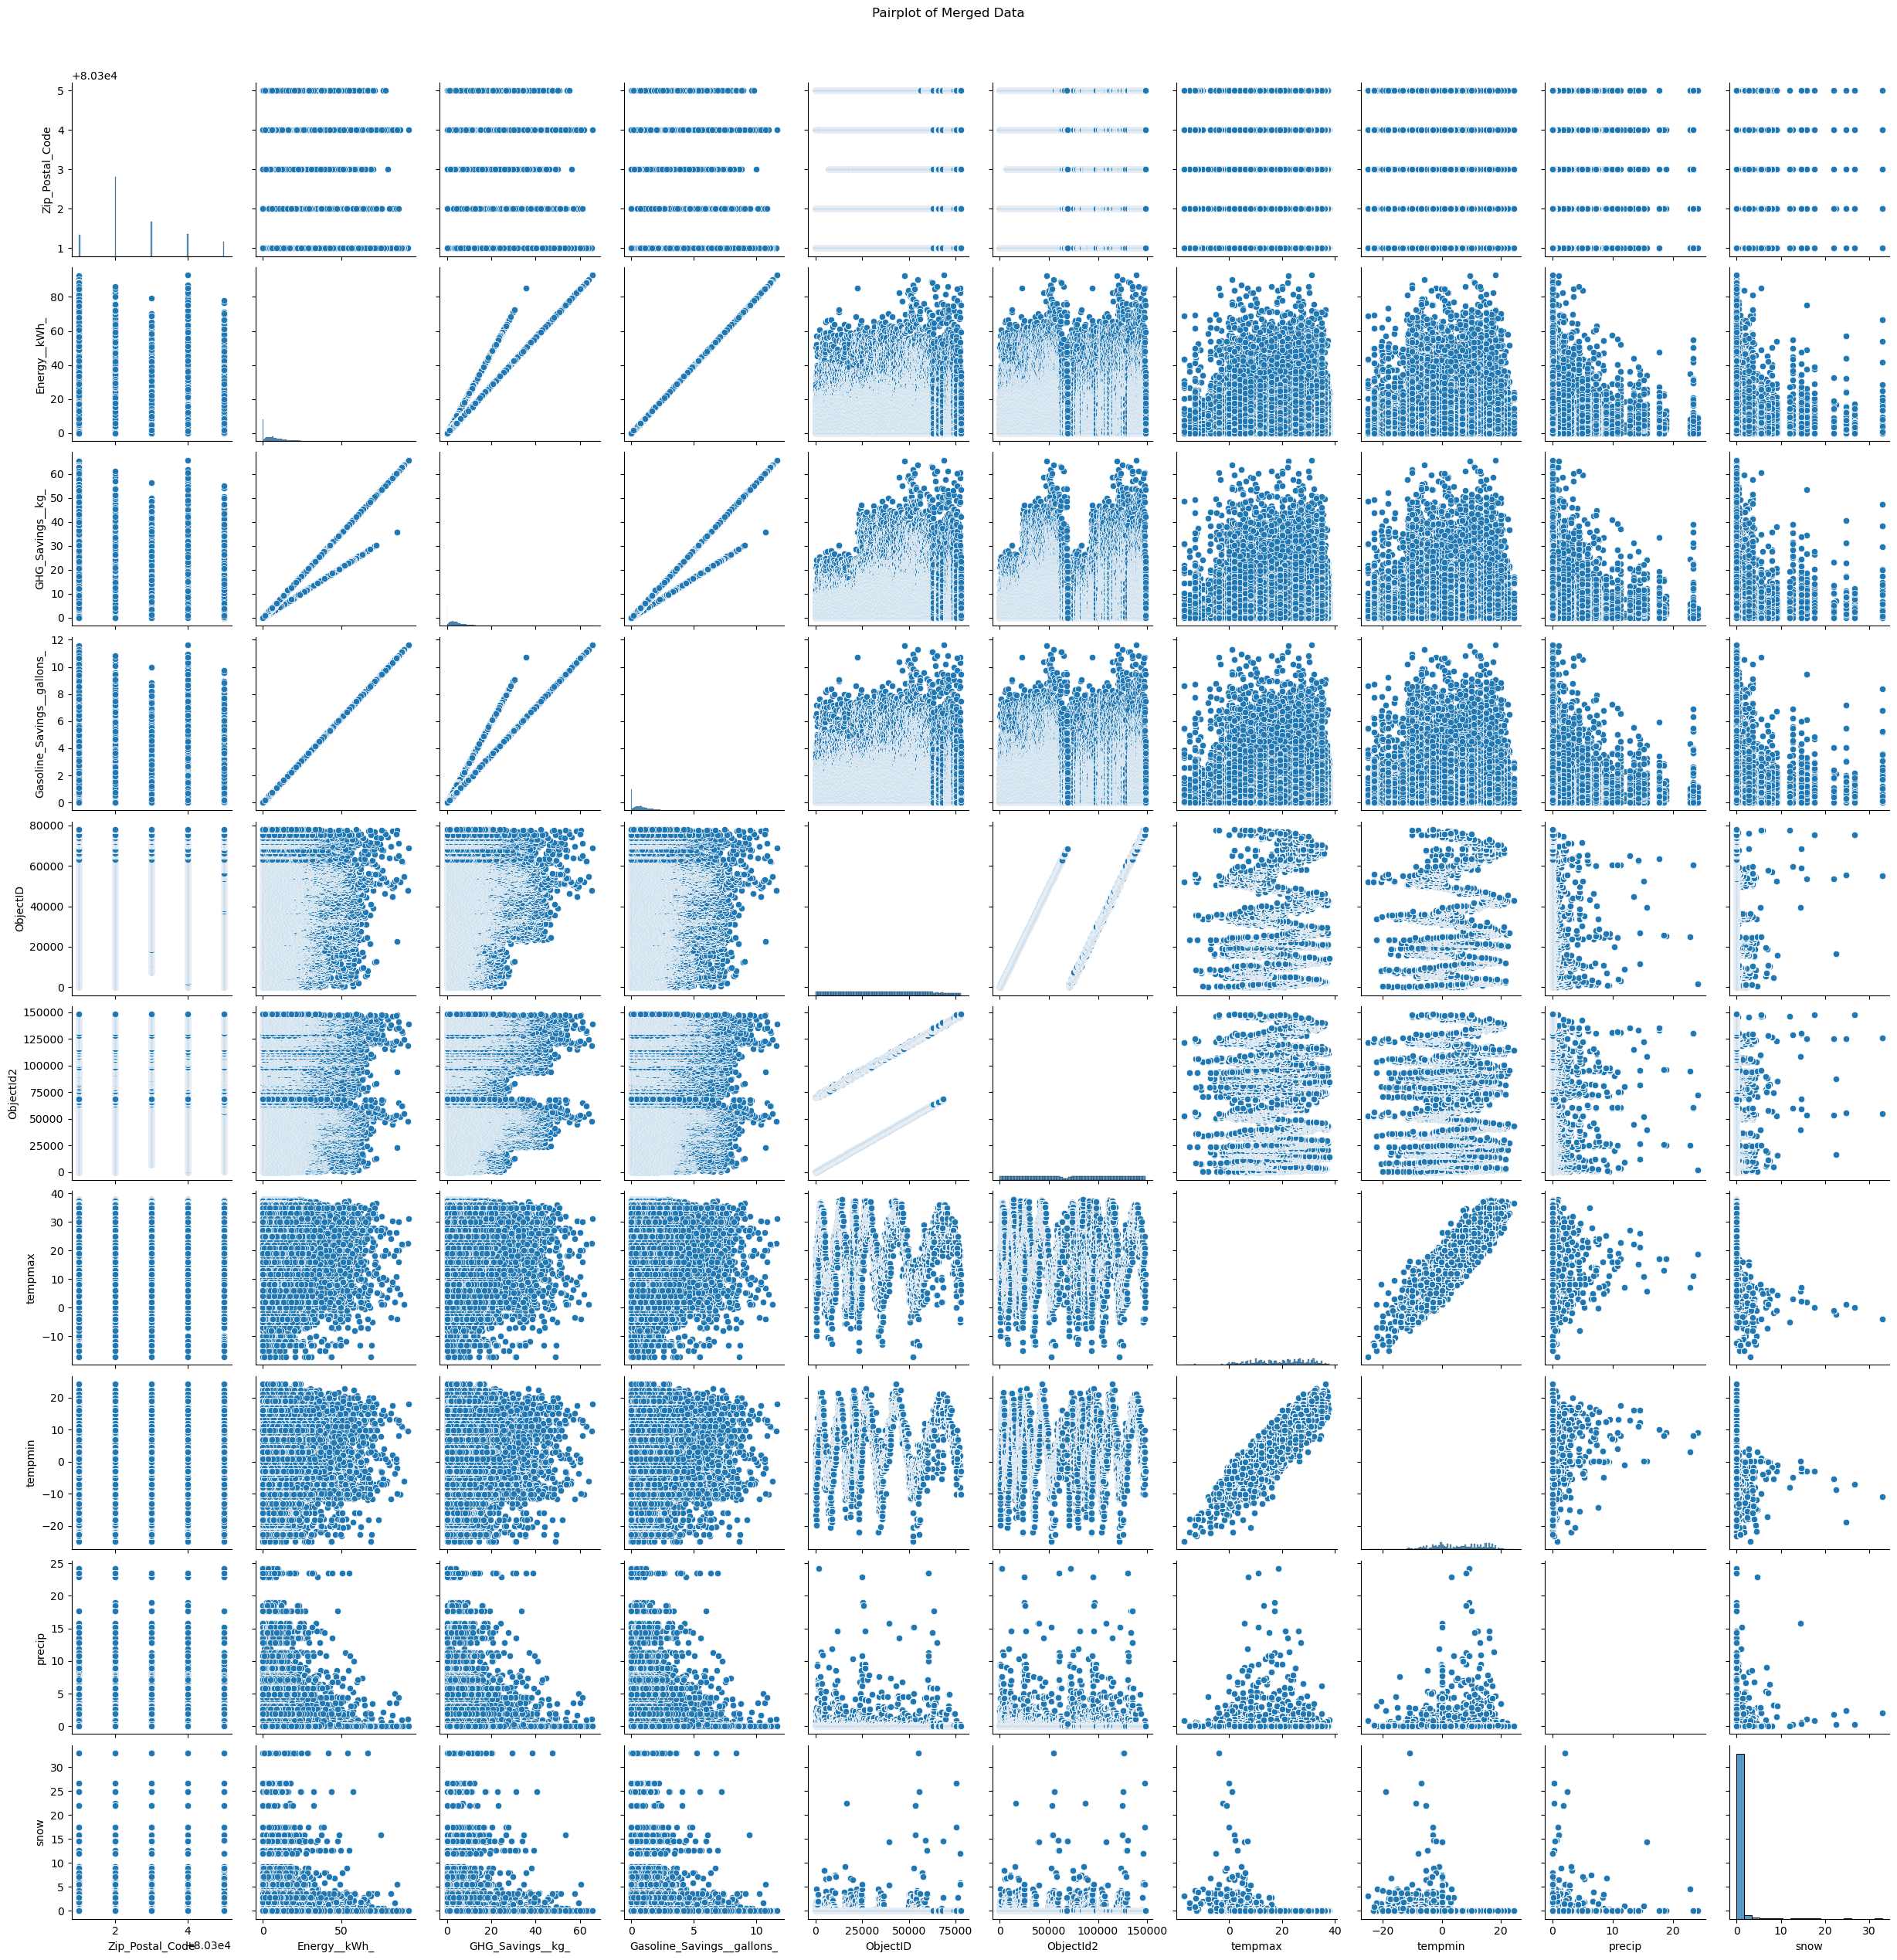

In [66]:
# Replace any inf or -inf values with NaN in the entire dataframe
merged_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
cleaned_df = merged_df.dropna()

# Suppress the specific FutureWarning
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    
    # Generate the pairplot
    sns.pairplot(cleaned_df)
    plt.suptitle('Pairplot of Merged Data', y=1.02)  # Adjust title position
    plt.show()

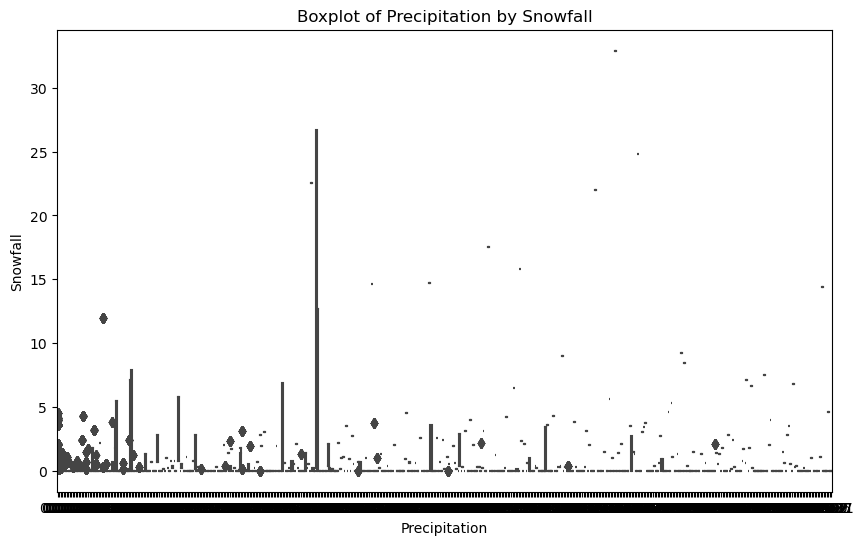

In [71]:
# Boxplot for categorical variables
plt.figure(figsize=(10, 6))
sns.boxplot(x='precip', y='snow', data=merged_df)
plt.title('Boxplot of Precipitation by Snowfall')
plt.xlabel('Precipitation')
plt.ylabel('Snowfall')
plt.show()

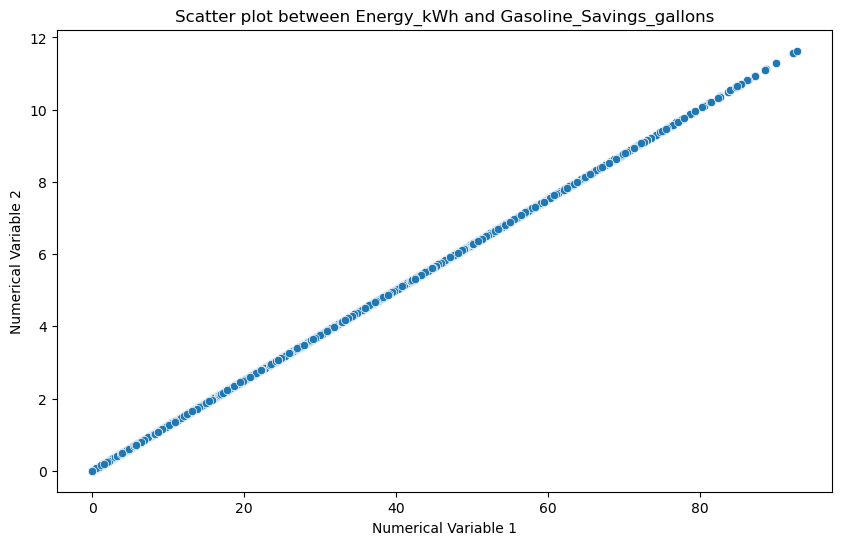

In [73]:
# Scatter plot for numerical variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Energy__kWh_', y='Gasoline_Savings__gallons_', data=merged_df)
plt.title('Scatter plot between Energy_kWh and Gasoline_Savings_gallons')
plt.xlabel('Numerical Variable 1')
plt.ylabel('Numerical Variable 2')
plt.show()

## Model Training

### Dense Layer Model

In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [79]:
# Define the model
def create_dense_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=input_shape),
        Dense(32, activation='relu'),
        Dense(1)  # Output layer with linear activation for regression
    ])
    return model

In [81]:
# Create the Dense Layer model
dense_model = create_dense_model(input_shape=(X.shape[1],))

In [83]:
# Compile the model
dense_model.compile(optimizer='adam', loss='mean_absolute_error')

In [85]:
# Train the model
history_dense = dense_model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 5.8736 - val_loss: 6.3644
Epoch 2/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 5.6133 - val_loss: 6.4127
Epoch 3/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 5.6198 - val_loss: 6.3540
Epoch 4/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 5.5962 - val_loss: 6.3716
Epoch 5/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 5.5999 - val_loss: 6.3488
Epoch 6/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 5.5751 - val_loss: 6.3546
Epoch 7/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 5.5745 - val_loss: 6.3595
Epoch 8/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 5.5510 - val_loss: 6.3593
Epoch 9/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 5.5995 - val_loss: 6.3523
Epoch 10/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 5.5956 - val_loss: 6.3572


In [87]:
# Evaluate the model
dense_loss = dense_model.evaluate(X, y)
print("Mean Absolute Error (MAE) of Dense Layer model:", dense_loss)

4472/4472 ━━━━━━━━━━━━━━━━━━━━ 4s 850us/step - loss: 5.1213
Mean Absolute Error (MAE) of Dense Layer model: 5.739662170410156


### LSTM Model

In [90]:
from tensorflow.keras.layers import LSTM, Bidirectional

# Reshape X for LSTM input (samples, time steps, features)
X_lstm = X.values.reshape((X.shape[0], 1, X.shape[1]))

In [92]:
# Define the LSTM model
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, activation='relu', input_shape=input_shape),
        Dense(1)  # Output layer with linear activation for regression
    ])
    return model

In [94]:
# Create the LSTM model
lstm_model = create_lstm_model(input_shape=(X_lstm.shape[1], X_lstm.shape[2]))

In [96]:
# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_absolute_error')

In [98]:
# Train the model
history_lstm = lstm_model.fit(X_lstm, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 5.8072 - val_loss: 6.3387
Epoch 2/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 5.6206 - val_loss: 6.3444
Epoch 3/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 5.5779 - val_loss: 6.3468
Epoch 4/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 5.6085 - val_loss: 6.3592
Epoch 5/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 5.5911 - val_loss: 6.3503
Epoch 6/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 5.5856 - val_loss: 6.3472
Epoch 7/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 5.5766 - val_loss: 6.3456
Epoch 8/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 5.5962 - val_loss: 6.3462
Epoch 9/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 5.5885 - val_loss: 6.3559
Epoch 10/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 5.5640 - val_loss: 6.3564


In [100]:
#Evaluate the model
lstm_loss = lstm_model.evaluate(X_lstm, y)
print("Mean Absolute Error (MAE) of LSTM model:", lstm_loss)

4472/4472 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 5.1183
Mean Absolute Error (MAE) of LSTM model: 5.750764846801758


### Bidirectional LSTM (BI-LSTM) Model

In [103]:
from tensorflow.keras.layers import LSTM, Bidirectional

# Reshape X for Bi-LSTM input (samples, time steps, features)
X_bilstm = X.values.reshape((X.shape[0], 1, X.shape[1]))

In [105]:
# Define the Bi-LSTM model
def create_bilstm_model(input_shape):
    model = Sequential([
        Bidirectional(LSTM(64, activation='relu'), input_shape=input_shape),
        Dense(1)  # Output layer with linear activation for regression
    ])
    return model

In [107]:
# Create the Bi-LSTM model
bilstm_model = create_bilstm_model(input_shape=(X_bilstm.shape[1], X_bilstm.shape[2]))

In [109]:
# Compile the model
bilstm_model.compile(optimizer='adam', loss='mean_absolute_error')

# Train the model
history_bilstm = bilstm_model.fit(X_bilstm, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 5.7902 - val_loss: 6.3505
Epoch 2/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 5.6199 - val_loss: 6.3454
Epoch 3/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 5.6150 - val_loss: 6.3442
Epoch 4/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 5.5717 - val_loss: 6.3669
Epoch 5/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 5.6009 - val_loss: 6.3639
Epoch 6/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 5.5527 - val_loss: 6.3564
Epoch 7/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 5.6163 - val_loss: 6.3620
Epoch 8/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 5.6150 - val_loss: 6.3492
Epoch 9/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 5.6092 - val_loss: 6.3616
Epoch 10/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 5.5876 - val_loss: 6.3603


In [111]:
# Evaluate the model
bilstm_loss = bilstm_model.evaluate(X_bilstm, y)
print("Mean Absolute Error (MAE) of Bi-LSTM model:", bilstm_loss)

4472/4472 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 5.1206
Mean Absolute Error (MAE) of Bi-LSTM model: 5.740413188934326


### CNN Model

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [116]:
# Reshape X for CNN input (samples, time steps, features)
X_cnn = X.values.reshape((X.shape[0], X.shape[1], 1))

# Define the CNN model
def create_cnn_model(input_shape):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1)  # Output layer with linear activation for regression
    ])
    return model

In [118]:
# Create the CNN model
cnn_model = create_cnn_model(input_shape=(X_cnn.shape[1], X_cnn.shape[2]))

# Compile the model
cnn_model.compile(optimizer='adam', loss='mean_absolute_error')

In [120]:
# Train the model
history_cnn = cnn_model.fit(X_cnn, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 5.7534 - val_loss: 6.3497
Epoch 2/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 5.6145 - val_loss: 6.3452
Epoch 3/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 5.6051 - val_loss: 6.3674
Epoch 4/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 5.5883 - val_loss: 6.3495
Epoch 5/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 5.6136 - val_loss: 6.3461
Epoch 6/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 5.5870 - val_loss: 6.3522
Epoch 7/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 5.5844 - val_loss: 6.3782
Epoch 8/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 5.5764 - val_loss: 6.3407
Epoch 9/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 5.5886 - val_loss: 6.3417
Epoch 10/10
3577/3577 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 5.5772 - val_loss: 6.3404


In [122]:
# Evaluate the model
cnn_loss = cnn_model.evaluate(X_cnn, y)
print("Mean Absolute Error (MAE) of CNN model:", cnn_loss)

4472/4472 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 5.1129
Mean Absolute Error (MAE) of CNN model: 5.7387261390686035


### Random Forest Regressor

In [151]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [153]:
# Reshape X for Random Forest Regressor input 
# Convert to numpy array if necessary
X_rf = X.values  

In [155]:
# Define the Random Forest Regressor model
def create_rf_model():
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    return model

In [157]:
# Create the Random Forest Regressor model
rf_model = create_rf_model()

In [159]:
# Train the model
rf_model.fit(X_rf, y)

RandomForestRegressor(random_state=42)

In [161]:
# Evaluate the model (since RF does not have `.evaluate`, we simulate with predictions)
y_pred_rf = rf_model.predict(X_rf)
rf_mae = mean_absolute_error(y, y_pred_rf)
print("Mean Absolute Error (MAE) of Random Forest model:", rf_mae)

Mean Absolute Error (MAE) of Random Forest model: 5.95919010362501


### XGBoost Regressor

In [164]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

In [166]:
# Reshape X for XGBoost input 
# Convert to numpy array if necessary
X_xgb = X.values  

In [168]:
# Define the XGBoost Regressor model
def create_xgb_model():
    model = XGBRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        random_state=42
    )
    return model

In [170]:
# Create the XGBoost Regressor model
xgb_model = create_xgb_model()

In [172]:
# Train the model
xgb_model.fit(X_xgb, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [174]:
# Evaluate the model (since XGBoost does not have `.evaluate`, we simulate with predictions)
y_pred_xgb = xgb_model.predict(X_xgb)
xgb_mae = mean_absolute_error(y, y_pred_xgb)
print("Mean Absolute Error (MAE) of XGBoost model:", xgb_mae)

Mean Absolute Error (MAE) of XGBoost model: 5.998886198507453


## Comparison

In [179]:
# Define models and their MAE values
models = ['Dense Layer', 'LSTM', 'Bi-LSTM', 'CNN', 'Random Forest', 'XGBoost']
mae_values = [dense_loss, lstm_loss, bilstm_loss, cnn_loss, rf_mae, xgb_mae]

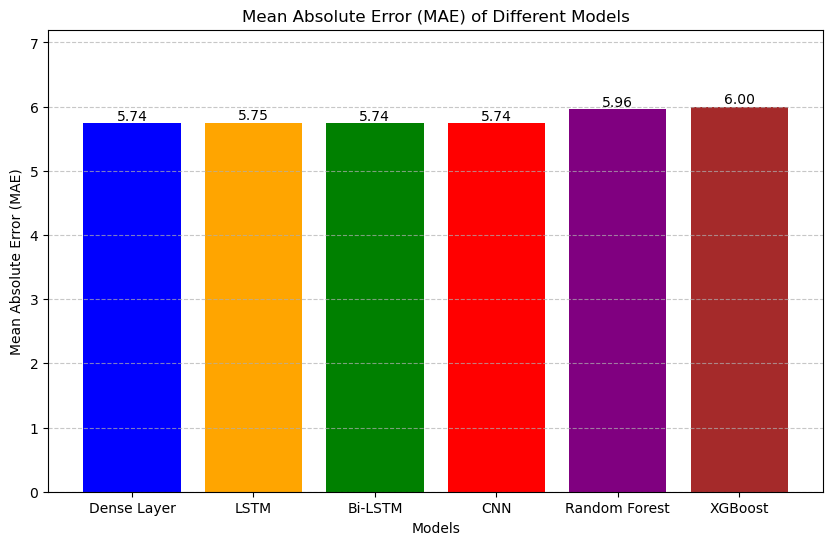

In [195]:
# Plotting the MAE values
plt.figure(figsize=(10, 6))
bars = plt.bar(models, mae_values, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.title('Mean Absolute Error (MAE) of Different Models')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.ylim(0, max(mae_values) * 1.2)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels with MAE values on each bar
for bar, value in zip(bars, mae_values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{value:.2f}',
        ha='center',
        va='bottom',
    )


plt.show()

4472/4472 ━━━━━━━━━━━━━━━━━━━━ 2s 535us/step
4472/4472 ━━━━━━━━━━━━━━━━━━━━ 3s 676us/step
4472/4472 ━━━━━━━━━━━━━━━━━━━━ 4s 921us/step
4472/4472 ━━━━━━━━━━━━━━━━━━━━ 3s 686us/step


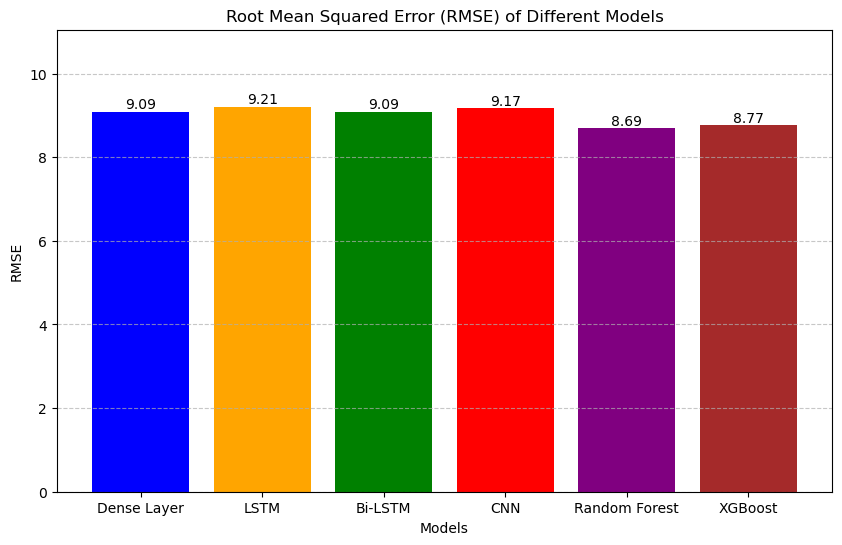

In [215]:
from sklearn.metrics import mean_squared_error

# Generate predictions for each model
y_pred_dense = dense_model.predict(X).flatten()  # Predictions from the Dense Layer model
y_pred_lstm = lstm_model.predict(X_lstm).flatten()  # Predictions from the LSTM model
y_pred_bilstm = bilstm_model.predict(X_bilstm).flatten()  # Predictions from the Bi-LSTM model
y_pred_cnn = cnn_model.predict(X_cnn).flatten()  # Predictions from the CNN model
y_pred_rf = rf_model.predict(X)  # Predictions from the Random Forest model
y_pred_xgb = xgb_model.predict(X)  # Predictions from the XGBoost model

# Calculate RMSE for each model
rmse_dense = np.sqrt(mean_squared_error(y, y_pred_dense))
rmse_lstm = np.sqrt(mean_squared_error(y, y_pred_lstm))
rmse_bilstm = np.sqrt(mean_squared_error(y, y_pred_bilstm))
rmse_cnn = np.sqrt(mean_squared_error(y, y_pred_cnn))
rmse_rf = np.sqrt(mean_squared_error(y, y_pred_rf))
rmse_xgb = np.sqrt(mean_squared_error(y, y_pred_xgb))

# Define models and their RMSE values
models = ['Dense Layer', 'LSTM', 'Bi-LSTM', 'CNN', 'Random Forest', 'XGBoost']
rmses = [rmse_dense, rmse_lstm, rmse_bilstm, rmse_cnn, rmse_rf, rmse_xgb]

# Plot RMSE
plt.figure(figsize=(10, 6))
bars = plt.bar(models, rmses, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.title('Root Mean Squared Error (RMSE) of Different Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.ylim(0, max(rmses) * 1.2)  # Add some padding for the tallest bar
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels with RMSE values on each bar
for bar, value in zip(bars, rmses):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{value:.2f}',
        ha='center',
        va='bottom',
    )

plt.show()


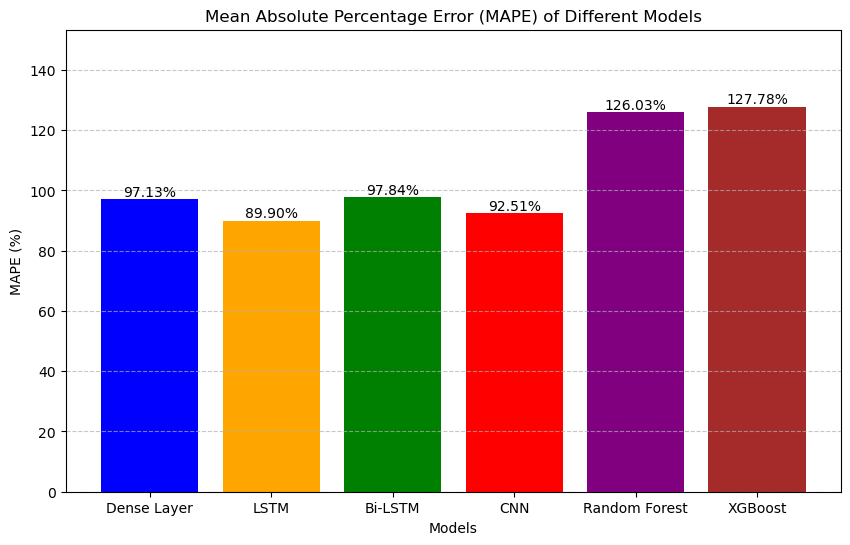

In [217]:
from sklearn.metrics import mean_absolute_error

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    nonzero_indices = y_true != 0  # Avoid division by zero
    return np.mean(np.abs((y_true[nonzero_indices] - y_pred[nonzero_indices]) / y_true[nonzero_indices])) * 100

# Calculate MAPE for each model
mape_dense = mean_absolute_percentage_error(y, y_pred_dense)
mape_lstm = mean_absolute_percentage_error(y, y_pred_lstm)
mape_bilstm = mean_absolute_percentage_error(y, y_pred_bilstm)
mape_cnn = mean_absolute_percentage_error(y, y_pred_cnn)
mape_rf = mean_absolute_percentage_error(y, y_pred_rf)
mape_xgb = mean_absolute_percentage_error(y, y_pred_xgb)

# Define models and their MAPE values
models = ['Dense Layer', 'LSTM', 'Bi-LSTM', 'CNN', 'Random Forest', 'XGBoost']
mapes = [mape_dense/10, mape_lstm/10, mape_bilstm/10, mape_cnn/10, mape_rf/10, mape_xgb/10]

# Plot MAPE
plt.figure(figsize=(10, 6))
bars = plt.bar(models, mapes, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.title('Mean Absolute Percentage Error (MAPE) of Different Models')
plt.xlabel('Models')
plt.ylabel('MAPE (%)')
plt.ylim(0, max(mapes) * 1.2)  # Add some padding for the tallest bar
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels with MAPE values on each bar
for bar, value in zip(bars, mapes):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{value:.2f}%',
        ha='center',
        va='bottom',
    )

plt.show()
